100%|===================| 54696/54785 [02:22<00:00]        

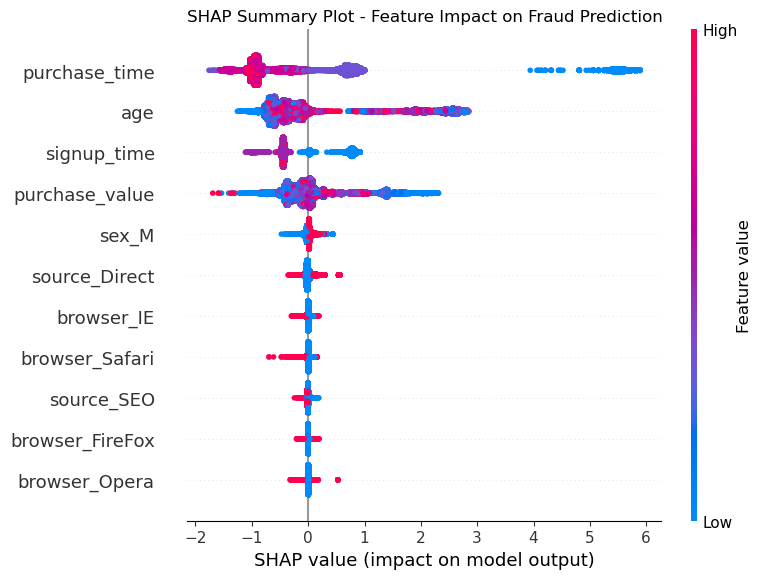

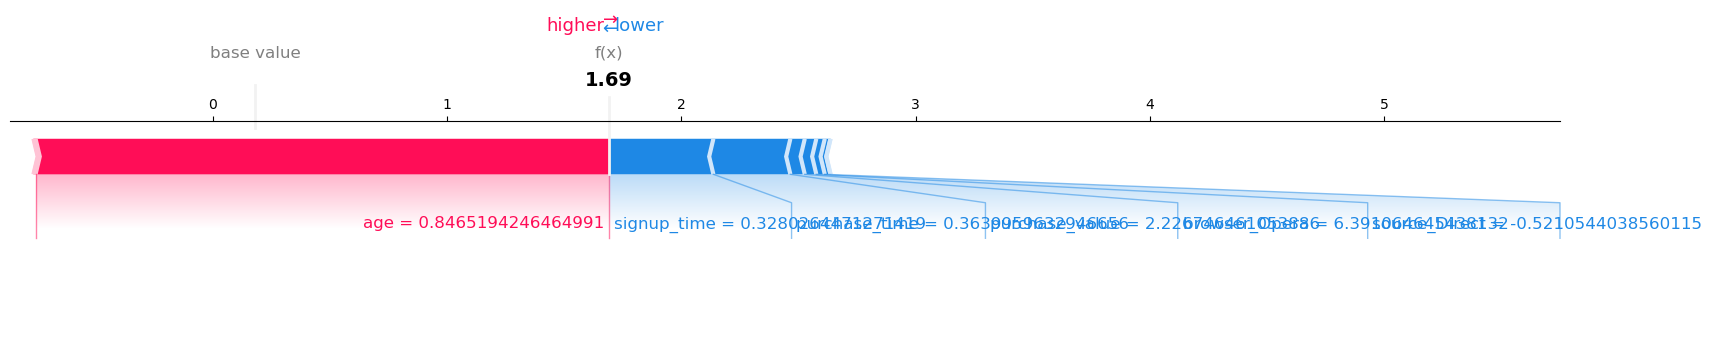

In [19]:
# -------------------------------------------------------------
# Task 3: Model Explainability with SHAP for Fraud Detection
# -------------------------------------------------------------
# Objective:
# In this task, we aim to understand *why* our trained LightGBM model makes certain predictions—
# particularly in the context of fraudulent transaction detection. We will achieve this using SHAP (SHapley Additive exPlanations),
# a powerful method that provides both global (overall feature importance) and local (individual prediction) interpretability.

# ---------------------
# 1. Import Libraries
# ---------------------
import pandas as pd                            # For data handling and manipulation
import lightgbm as lgb                         # LightGBM model (already trained and saved)
import shap                                    # SHAP library for explainability
from sklearn.model_selection import train_test_split  # To recreate the train-test split
import matplotlib.pyplot as plt                # For SHAP visualizations

# Initialize JavaScript support for interactive plots (optional in notebook environments)
shap.initjs()

# ---------------------
# 2. Load Preprocessed Dataset
# ---------------------
# Load the cleaned, encoded, and resampled dataset (used during training).
# This dataset should contain meaningful features and a balanced target.
df = pd.read_csv('../data/processed/processed_fraud_data.csv')

# ---------------------
# 3. Define Features and Target
# ---------------------
# Our goal is to predict `class` (0 = non-fraud, 1 = fraud).
# We split it into features (X) and target variable (y).
X = df.drop("class", axis=1)
y = df["class"]

# ---------------------
# 4. Split Data (Train/Test)
# ---------------------
# Reproduce the same data split used during training to ensure consistency in SHAP values.
# Use 20% for testing and a fixed random seed.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------
# 5. Load Trained LightGBM Model
# ---------------------
# Load the best-performing model trained earlier.
# LightGBM provides the Booster interface for model loading and prediction.
model = lgb.Booster(model_file='../models/lightgbm_model.txt')

# ---------------------
# 6. Create SHAP Explainer
# ---------------------
# We use TreeExplainer for LightGBM models, which leverages model structure for fast computation.
# The explainer computes SHAP values by comparing feature contributions to the average prediction.
explainer = shap.Explainer(model, X_train)

# ---------------------
# 7. Compute SHAP Values
# ---------------------
# Calculate SHAP values for the test set.
# These values show the effect of each feature on individual predictions.
shap_values = explainer(X_test)

# ---------------------
# 8. SHAP Summary Plot (Global Explainability)
# ---------------------
# This plot ranks features by importance based on the magnitude of SHAP values.
# - Each dot represents a prediction for one sample.
# - Color indicates the feature value (red = high, blue = low).
# - Position on the X-axis shows the feature’s impact (positive = pushes toward fraud).
plt.title("SHAP Summary Plot - Feature Impact on Fraud Prediction")
shap.summary_plot(shap_values, X_test)

# ---------------------
# 9. SHAP Force Plot (Local Explainability)
# ---------------------
# Now, we visualize a single prediction in detail (local interpretability).
# - Red bars show features pushing the prediction toward fraud (1).
# - Blue bars show features pulling it toward non-fraud (0).
# - Helps audit or explain specific flagged transactions.
# We'll inspect the first test sample.
shap.force_plot(
    explainer.expected_value,        # The base value (mean model prediction)
    shap_values[0].values,           # SHAP values for the first instance
    X_test.iloc[0],                  # Feature values for that transaction
    matplotlib=True                  # Ensures plot renders in static environments
)


In [9]:
# ----------------------------------------
# 📂 2. Load Preprocessed Data and check columns
# ----------------------------------------
df = pd.read_csv('../data/processed/processed_fraud_data.csv')

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Print column names to verify the target column name
print("Columns in DataFrame:", df.columns.tolist())

# Print first 5 rows to verify data
print(df.head())

# Now replace 'is_fraud' with the exact target column name you find in the output
target_column = 'is_fraud'  # Replace this if the actual name is different

# Extract features and target
X = df.drop(target_column, axis=1)
y = df[target_column]


Columns in DataFrame: ['signup_time', 'purchase_time', 'purchase_value', 'age', 'source_Direct', 'source_SEO', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'sex_M', 'class']
   signup_time  purchase_time  purchase_value       age  source_Direct  \
0     0.328026       0.363996       -0.160051  0.680651      -0.521054   
1     0.328026       0.363996       -1.151473  2.324340      -0.521054   
2    -1.074140      -2.150416       -1.206552  2.324340      -0.521054   
3     0.328026       0.363996        0.390739  0.915464      -0.521054   
4     1.730193       1.621202        0.115344  1.385089      -0.521054   

   source_SEO  browser_FireFox  browser_IE  browser_Opera  browser_Safari  \
0    1.241952        -0.443219   -0.555059      -0.156468       -0.436403   
1   -0.805205        -0.443219   -0.555059      -0.156468       -0.436403   
2    1.241952        -0.443219   -0.555059       6.391065       -0.436403   
3    1.241952        -0.443219   -0.555059      -0

KeyError: "['is_fraud'] not found in axis"